## <font color=darkblue> Introduction to Feed Forward Neural Networks</font>


In this notebook, we provide an **overview of feed forward neural networks**, also known as Multi Layer Perceptrons (MLP) or Dense Neural Networks, which are commonly used in machine/deep learning.
These networks are very flexible to propose nonlinear models for regression and classification tasks.

In this session we set the focus on these simple networks which allows us to discuss backpropagation of gradient and implementation in keras/torch.  

### <font color=darkred> Bibliography & additional ressources </font>

-  [1] Probabilistic machine learning: an introduction, Kevin P. Murphy, 2022, https://probml.github.io/pml-book/book1.html
``Full book online with all basics on machine learning. Not state-of-the-art but very good introduction``
- [2] Deep learning course, Ms. Sc. Institut Polytechnique de Paris, https://github.com/m2dsupsdlclass/lectures-labs


### <font color=darkred>Introduction : general framework & motivations</font>

Parameter inference in statistical/machine learning often boils down to solving

\begin{equation*}
\mathrm{argmin}_{\theta \in \mathbb{R}^d} \,\{\ell_n(\theta) + \lambda \mathrm{pen}(\theta)\}\,,
\end{equation*}

with $\lambda>0$, $\mathrm{pen}(\cdot)$ some penalization function and $f$ a ``goodness-of-fit function``  based on a loss $\ell$,

\begin{equation*}
\ell_n(\theta) = \frac 1n \sum_{i=1}^n \ell(\theta,y_i, x_i)\,,
\end{equation*}

 where $(x_i,y_i)_{1\leq i\leq n}$ are ``training examples of inputs and outputs`` (in a supervised setting), and $w$ is an ``unknown parameter to be estimated.``


**Classification**. For instance, in a classification task where $Y_i\in\{1,\ldots, M\}$ and $X_i\in\mathbb{R}^d$, the loglikelihood of the data $\{(X_i,Y_i)\}_{1\leq i\leq n}$ writes:
$$
\log \mathbb{P}_\theta(Y_{1:n} = y_{1:n}| X_{1:n}) = \sum_{i=1}^n \log \mathbb{P}_\theta(Y_{i} = y_i| X_{i})\,,
$$
so that
$$
f:\theta\mapsto -\frac{1}{n}\sum_{i=1}^n \log \mathbb{P}_\theta(Y_{i} = y_i| X_{i})\,.
$$
The only remaining step before training a model and validating the results is to chose a **specific form** for $\mathbb{P}_\theta(Y_{i} = y_i| X_{i})$, $1\leq i \leq n$.  When $Y_i\in\{0,1\}$, the **logistic regression** models the distribution of $Y$ given $X$ as
\begin{equation*}
\mathbb{P}_\theta(Y = 1| X) = \sigma(\langle \theta,X \rangle )\,,
\end{equation*}
where $\theta \in \mathbb{R}^d$ is a vector of model weights, and where $\sigma$ is the sigmoid function.

$$
\sigma: z \mapsto \frac{1}{1 + e^{-z}}\,.
$$

The common choice when $Y_i\in\{1,\ldots,M\}$ is the **softmax function**: for all $1\leqslant i\leqslant M$
$$
\mathbb{P}_{\theta}(Y_i = k | X_i) = \frac{\mathrm{e}^{\omega_k^TX_i + b_k}}{\sum_{j=1}^M\mathrm{e}^{\omega_j^TX_i + b_j}}\,.
$$
The unknown parameters are $\theta = \{\omega_1,b_1,\ldots,\omega_M,b_L\}$.

The standard approach to estimate the parameters is by maximizing the logarithm of the likelihood i.e. by minimizing the opposite of the normalized loglikelihood:
$$
\ell_n:\theta \mapsto -\frac{1}{n} \sum_{i=1}^n\sum_{k=1}^{M} \mathbb{1}_{Y_i=k}\log \mathbb{P}_{\theta}(Y_i = k | X_i) = -\frac{1}{n} \sum_{i=1}^n\sum_{k=1}^{M} \mathbb{1}_{Y_i=k}\log \frac{\mathrm{e}^{\omega_k^TX_i + b_k}}{\sum_{j=1}^M\mathrm{e}^{\omega_j^TX_i + b_j}}\,.
$$
This can also be written
$$
\ell_n:\theta \mapsto -\frac{1}{n} \sum_{i=1}^n\sum_{k=1}^{M} \mathbb{1}_{Y_i=k}\left(\omega_k^TX_i + b_k - \log \left(\sum_{j=1}^M\mathrm{e}^{\omega_j^TX_i + b_j}\right)\right)\,.
$$
Neural networks offer flexible solutions to introduce more complex nonlinear expressions for $\mathbb{P}_{\theta}(Y_i = k | X_i)$, $1\leq k \leq M$.

**Regression**. In a regression setting, it is assumed that the observations satisfy for all $1\leqslant i \leqslant n$, $Y_i = f_\star(X_i) + \varepsilon_i$ where the $(\varepsilon_i)_{1\leqslant i\leqslant n}$ are i.i.d. centered random variables in $\mathbb{R}^M$, $X_i\in\mathbb{R}^d$ and $f_{\star}$ is an unknown function.  The standard approach to estimate the parameters is by minimizing the mean square error:
$$
\ell_n:\theta \mapsto  \frac{1}{n} \sum_{i=1}^n\left\|f_{\theta}(X_i) - Y_i\right\|^2\,,
$$
where $f_{\theta}$ is a nonlinear parametric function used to estimate the unknown function $f_\star$. In this session we focus on these **regression settings** to explain the backpropagation of gradients.

## <font color=darkred> Part *I* : Feed Forward Neural Networks </font>

#### Preamble: linear models

In a linear model, we propose to predict the observations using $f_\theta : x \mapsto x^\top \theta$.
For instance, for scalar observations, this means that $Y_i$ is predicted by $X^\top_i \theta$.

The penalized least squares estimate of $\theta$ is defined as a solution to

$$
\widehat \theta\in  \mathrm{argmin}_{\theta\in\mathbb{R}^d}\,\left( \|Y - X\theta\|_2^2 + \lambda \|\theta\|_2^2\right)\,,
$$

where $\lambda>0$, $Y = (Y_1,\ldots, Y_n)^\top$ and $X$ is the matrix whose $i$-th row is $X_i^\top$.

The matrix $X^\top X + \lambda I_n$ is definite positive for all $\lambda>0$ as for all $u\in\mathbb{R}^d$,

$$
u^\top (X^\top X + \lambda I_n)u = \|Xu\|_2^2 + \lambda \|u\|_2^2\,,
$$

which is positive for all $u\neq 0$.

Therefore,  the matrix $X^TX + \lambda I_n$ is invertible for all $\lambda>0$. Using that for all $\lambda>0$,

$$
\nabla \left(\|Y - X\theta\|_2^2 + \lambda \|\theta\|_2^2\right) = 2X^\top X\theta - 2X^\top Y +  2\lambda\theta = 2\left\{\left(X^\top X + \lambda I_d\right)\theta -X^\top Y\right\}\,.
$$

Therefore,

$$
\widehat \theta = \left(X^\top X + \lambda I_d\right)^{-1}X^\top Y\,.
$$

In [2]:
import datetime

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
import pandas as pd
import seaborn as sns

In [3]:
plt.rcParams.update(
    {
        "font.size": 25,
        "figure.figsize": (14, 7),
        "axes.grid": True,
        "grid.color": "#93a1a1",
        "grid.alpha": 0.3,
        "axes.spines.top": False,
        "axes.spines.right": False,
    }
)

<font color=darkred>Write a function ``sample_data_iid_linear`` to sample observations from the following model.</font>

**Observed data**: $Y_k = \sum_{j=1}^d \beta_j X_k(j) + \varepsilon_k$, where $\varepsilon_k$ are i.i.d. $\mathcal{N}(0,\sigma^2)$

In [5]:
# function to sample a dataset - linear observation model
def sample_data_iid_linear(beta, sigma, n, d):
    X = np.random.randn(n, d)
    y = X @ beta + sigma * np.random.randn(n)
    return X, y

<font color=darkred>Write a function ``sample_data_iid_nonlinear`` to sample observations from the following model.</font>

**Observed data**: $Y_k = \sum_{j=1}^d \cos(X_k(j)) + \varepsilon_k$, where $\varepsilon_k$ are i.i.d. $\mathcal{N}(0,\sigma^2)$

In [9]:
# function to sample a dataset - nonlinear observation model
def sample_data_iid_nonlinear(sigma, n, d):
    X = np.random.randn(n,d)
    y = np.sum(np.cos(X), axis=1) + sigma * np.random.randn(n)
    return X, y

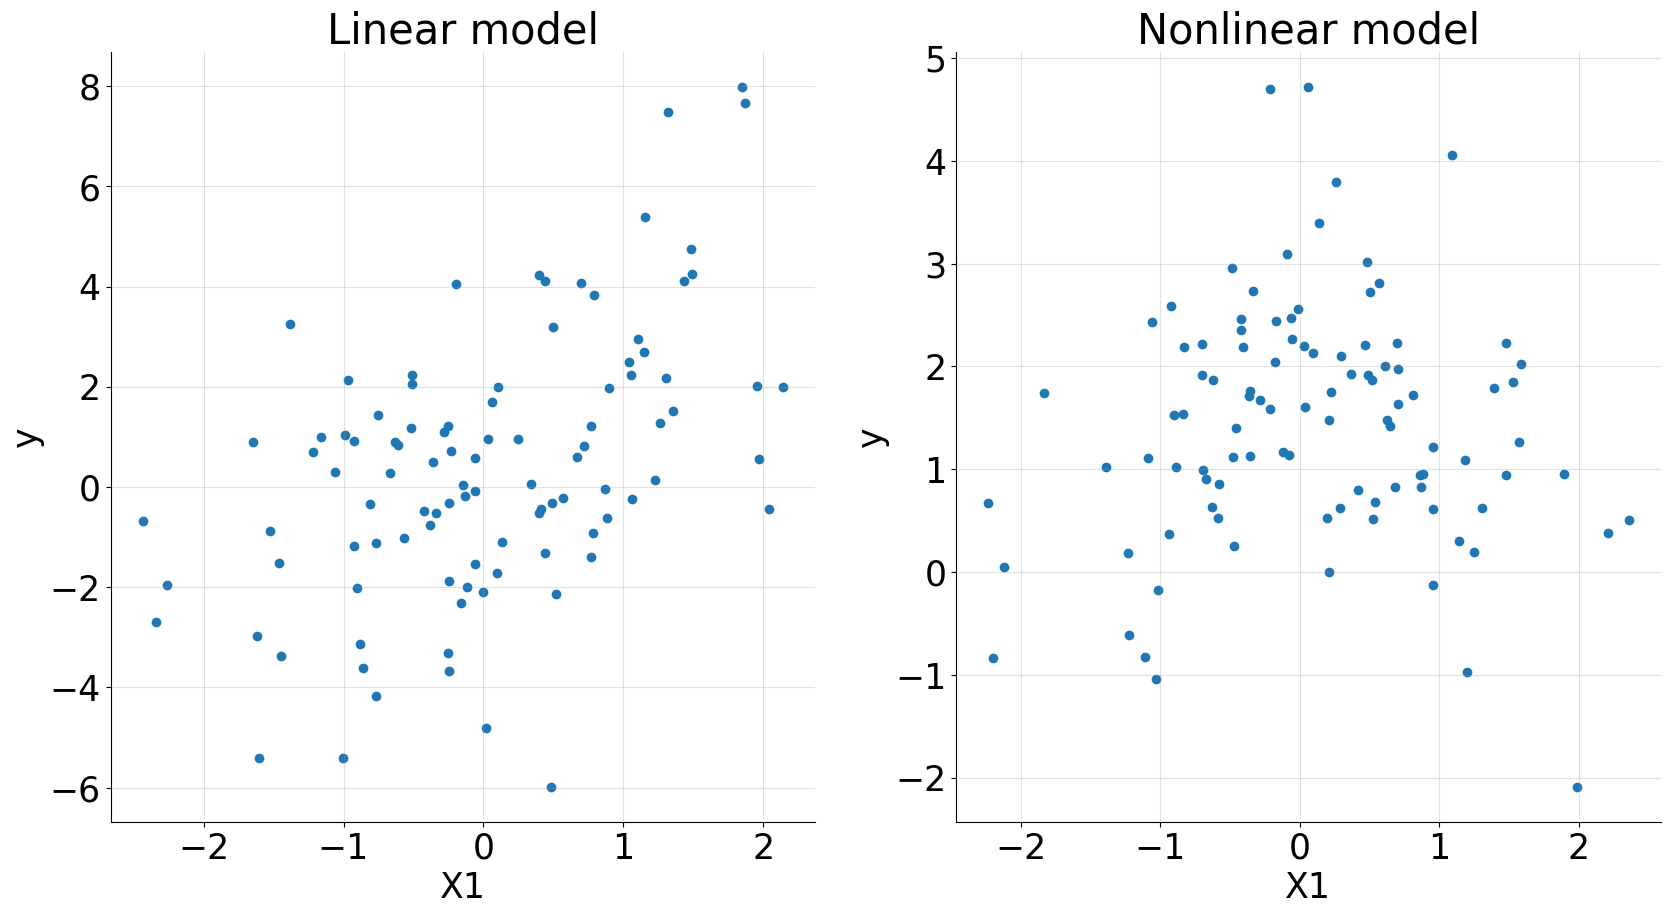

In [12]:
X_lin, y_lin = sample_data_iid_linear(np.array([1, 2]), 1, 100, 2)
X_nonlin, y_nonlin = sample_data_iid_nonlinear(1, 100, 2)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].scatter(X_lin[:, 0], y_lin)
ax[0].set_title("Linear model")
ax[0].set_xlabel("X1")
ax[0].set_ylabel("y")
ax[1].scatter(X_nonlin[:, 0], y_nonlin)
ax[1].set_title("Nonlinear model")
ax[1].set_xlabel("X1")
ax[1].set_ylabel("y")
plt.show()


<font color=darkred>Sample a dataset (train and test) with the linear observation model</font>

In [31]:
# set parameters
n_train = 1000
n_test = 100
d = 2
sigma = 0.5
beta = np.random.multivariate_normal(np.zeros(d), np.eye(d))

# sample data
X_train, Y_train = sample_data_iid_linear(beta, sigma, n_train, d)
X_test, Y_test = sample_data_iid_linear(beta, sigma, n_test, d)

<font color=darkred>Train a Ridge regression model using RidgeCV from sklearn.linear_model</font>

In [32]:
# fit linear regression
lr = RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True)
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Linear regression MSE: {mse}")
print(f"Linear regression coefficients: {lr.coef_}")
print(f"Linear regression intercept: {lr.intercept_}")


Linear regression MSE: 0.21438791939377194
Linear regression coefficients: [ 1.33822516 -0.13186605]
Linear regression intercept: -0.031034980674648667


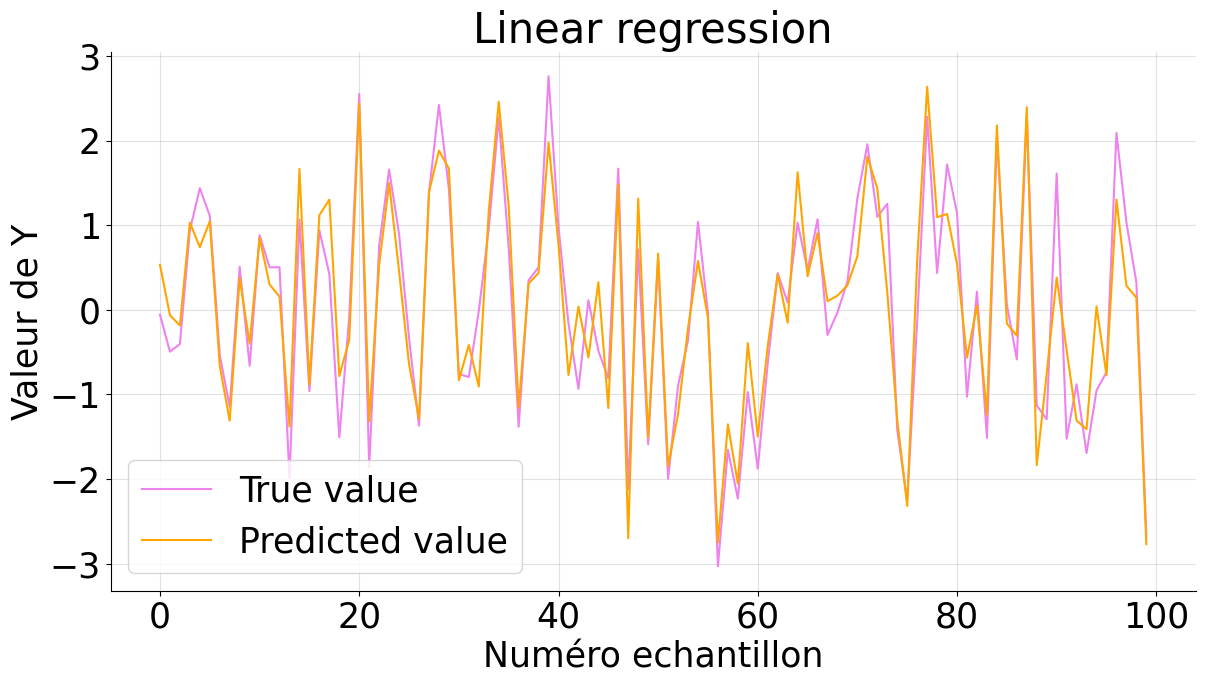

In [34]:
plt.plot(np.arange(n_test), Y_test, label="True value", color='violet')
plt.plot(np.arange(n_test), Y_pred, label="Predicted value", color='orange')
plt.xlabel("Numéro echantillon")
plt.ylabel("Valeur de Y")
plt.title("Linear regression")
plt.legend()
plt.show()

<font color=darkred>Perform the analysis again with data sampled from the nonlinear observation model ``sample_data_iid_nonlinear``</font>

In [28]:
# Non linear model
X_train_non, Y_train_non = sample_data_iid_nonlinear(sigma, n_train, d)
X_test_non, Y_test_non = sample_data_iid_nonlinear(sigma, n_test, d)

# fit linear regression
lr = RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True)
lr.fit(X_train_non, Y_train_non)
Y_pred_non = lr.predict(X_test_non)
mse = mean_squared_error(Y_test_non, Y_pred_non)
print(f"Linear regression MSE: {mse}")

Linear regression MSE: 0.8343106150065936


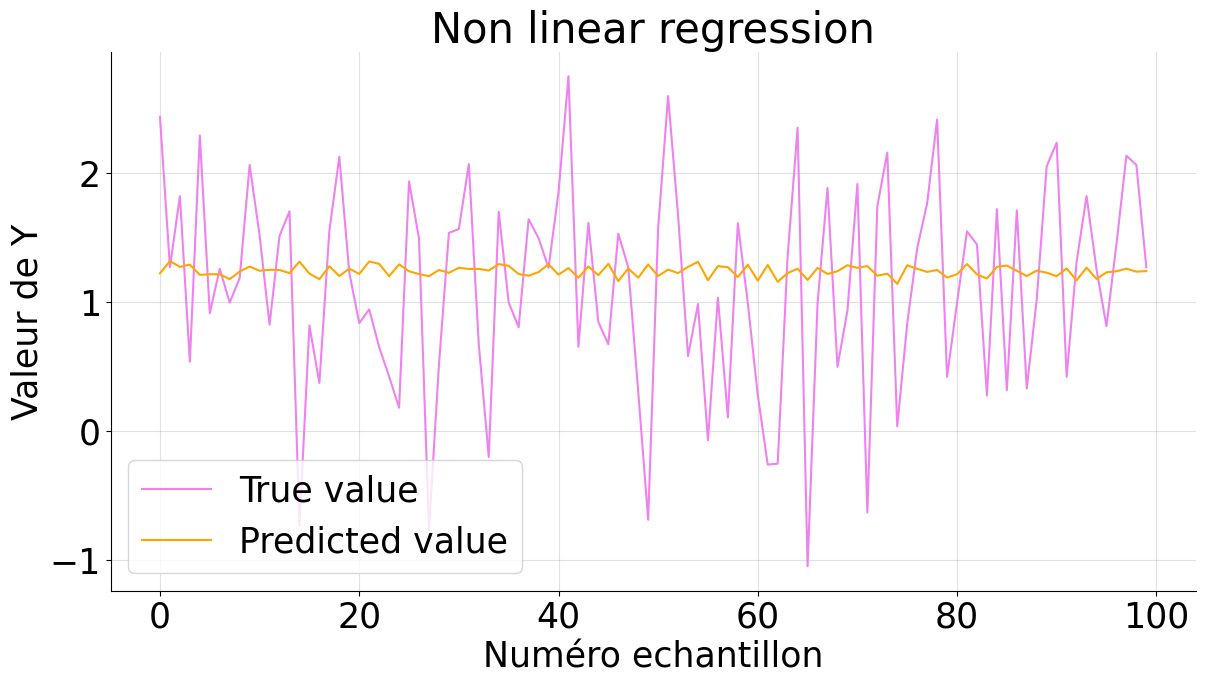

In [29]:
plt.plot(np.arange(n_test), Y_test, label="True value", color='violet')
plt.plot(np.arange(n_test), Y_pred, label="Predicted value", color = 'orange')
plt.xlabel("Numéro echantillon")
plt.ylabel("Valeur de Y")
plt.title("Non linear regression")
plt.legend()
plt.show()

In this case, the linear model **has very poor performance**. This is no surprise as the observations were generated using a nonlinear transform of the input.

This session is devoted to more complex nonlinear models to transform input data based of **successive combinations of linear and nonlinear transformation of the input**.

#### Multi-layer models

The **Multi-layer Perceptron (MLP)** or **Feed Forward Neural Network (FFNN)** weakens the modeling assumptions of the logistic regression and composed in parallel  $L$ perceptron units to produce the output. Let $x\in\mathbb{R}^d$ be the input and define all layers as follows.

\begin{align*}
h_{\theta}^0(x) &= x\,,\\
\mathrm{Linear\; transform}\qquad z_{\theta}^k(x)  &= b^k + W^kh_{\theta}^{k-1}(x)\quad \mathrm{for\;all\;} 1\leqslant k\leqslant L\,,\\
\mathrm{Nonlinear\; transform}\qquad h_{\theta}^k(x)  &= \varphi_k(z_{\theta}^{k}(x))\quad \mathrm{for\;all\;}1\leqslant k\leqslant L\,,
\end{align*}

where for all $1 \leqslant k \leqslant L$, $b^k\in\mathbb{R}^{d_k}$, $W^k\in\mathbb{R}^{d_k\times d_{k-1}}$, with $d_0 \equiv d$, and $\varphi^k: \mathbb{R}^{d_k} \to \mathbb{R}^{d_k}$ is a nonlinear activation function.

Let **$\theta = \{b^1,W^1,\ldots,b^L,W^L\}$ be the unknown parameters of the MLP and $f_{\theta}(x) = h_{\theta}^L(x)$** be the output layer of the MLP.

<font color=darkred>**Activation functions**</font>. As there is no modelling assumptions anymore, virtually any activation functions $\varphi^k$, $1 \leqslant k \leqslant L$ may be used. In this section, it is assumed that these intermediate activation functions apply elementwise and, with a minor abuse of notations, we write for all $1 \leqslant k \leqslant L$ and all $z\in\mathbb{R}^{d_m}$,
$$
\varphi^k(z) = (\varphi^k(z_1),\ldots, \varphi^k(z_{d_m}))\,,
$$
with $\varphi^k: \mathbb{R}\to \mathbb{R}$ the seleced scalar activation function. The rectified linear unit (RELU) activation function $x \mapsto \mathrm{max}(0,x)$ and its extensions are the default recommendation in modern implementations  ``(Jarrettet al., 2009; Nair and Hinton, 2010; Glorot et al., 2011a), (Maas et al.,2013),  (He et al., 2015)``. One of the major motivations arise from the gradient based parameter optimization which is numerically more stable with this choice. The choice of the last activation function $\varphi^L$ greatly relies on the task the network is assumed to perform.

- **Biclass classification**. The output $h_{\theta}^L(x)$ is the estimate of the probability that the class is $1$ given the input $x$. The common choice in this case is the sigmoid function. Then, $d_L = 1$ and $h_{\theta}^L(x)$ contains $\mathbb{P}(Y=1 | X)$ and is enough to use as a plug-in Bayes classifier.
$$
\varphi^L(z) =  \frac{\mathrm{e}^{z}}{1 + \mathrm{e}^{z}}\,.
$$
- **Multiclass classification**. The output $h_{\theta}^L(x)$ is the estimate of the probability that the class is  $k$ for all $1\leqslant k\leqslant M$, given the input $x$. The common choice in this case is the softmax function: for all $1\leqslant i\leqslant M$
$$
\varphi^L(z)_i = \mathrm{softmax}(z)_i = \frac{\mathrm{e}^{z_i}}{\sum_{j=1}^M\mathrm{e}^{z_j}}\,.
$$
In this case $d_L = M$ and each component $k$ of $h_{\theta}^L(x)$ contains $\mathbb{P}(Y=k | X)$.
- **Regression**. The output $h_{\theta}^L(x)$ is $f_\theta(x)$. A common choice for the last activation function is the *identity function* i.e, the last transform is only a linear transform.

<font color=darkred>**Training of $\theta$**</font>. For our regression task, the standard approach to estimate the parameters is by maximizing the logarithm of the likelihood i.e. by minimizing the opposite of the normalized loglikelihood:
$$
\ell_n:\theta \mapsto -\frac{1}{n} \sum_{i=1}^n \|Y_i - f_{\theta}(X_i)\|^2\,.
$$

To estimate the unknown parameter $\theta$, we use gradient descent algorithm which amounts to producing recursively parameter estimates using an update of the form:
$$\theta^{(k+1)} = \theta^{(k)} - \eta_{k+1} \nabla \ell_n(\theta^{(k)})\,.$$
Therefore, it is **required to compute $\nabla \ell_n(\theta^{(k)})$ efficiently**.

#### Historical derivation of activation functions

The first  mathematical model for a neuron was the **Threshold Logic Unit** ``(McCulloch and Pitts, 1943)``, with Boolean inputs and outputs. In this setting, the (deterministic) response associated with an input $x\in\{0,1\}^d$ is defined as
$$
g: x\mapsto \mathbb{1}_{\omega\sum_{j=1}^dx_j + b \geqslant 0}\,.
$$
This elementary model can be extended to real valued inputs ``(Rosenblatt, 1957)`` with
$$
g: x\mapsto \mathbb{1}_{\sum_{j=1}^d\omega_jx_j + b \geqslant 0}\,.
$$
In this case, the nonlinear activation function is $\sigma: x \mapsto \mathbb{1}_{x\geqslant 0}$ and the ouput in $\{0,1\}$ defined as:
$$
g:x \mapsto \sigma(\omega^Tx + b)\,.
$$

**Logistic regression** is another instance with the sigmoid **activation function** $\sigma: x\mapsto \mathrm{e}^x/(1+\mathrm{e}^x)$ and the output $ \sigma(\omega^TX + b)$ in $(0,1)$ is $\mathbb{P}(Y=1 | X)$.


#### Implementation with Keras - Dataset "water management"

https://www.kaggle.com/sudalairajkumar/chennai-water-management/version/3
This dataset has details about the water availability in the four reservoirs over the last 15 years. We use the information about 3 reservoirs to predict the information about the last one.

In [4]:
import numpy as np
# Load data
dataset = np.loadtxt('./chennai_reservoir_levels.csv', delimiter='|', skiprows=1, usecols=(1,2,3,4))

# Shuffle dataset
np.random.shuffle(dataset)

# Separate features and targets
X = dataset[:, 0:3]
y = dataset[:, 3]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(f"X_train: {X_train.shape}\ny_train: {y_train.shape}")
print(f"X_test: {X_test.shape}\ny_test: {y_test.shape}")

X_train: (4235, 3)
y_train: (4235,)
X_test: (1412, 3)
y_test: (1412,)


<font color=darkred>Scale data using ``StandardScaler`` from ``sklearn.preprocessing``</font>

In [11]:
from sklearn.preprocessing import StandardScaler

In [14]:
#

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ImportError: Traceback (most recent call last):
  File "C:\Users\tapri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: Une routine d’initialisation d’une bibliothèque de liens dynamiques (DLL) a échoué.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

In [1]:
import tensorflow 

ImportError: Traceback (most recent call last):
  File "C:\Users\tapri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: Une routine d’initialisation d’une bibliothèque de liens dynamiques (DLL) a échoué.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

**Model design**

In [15]:
input_d = 3
hidden_d = 8

<font color=darkred>Build one feed forward neural network with one hidden layer with dimension ``hidden_d`` with activation function ``relu``</font>

In [ ]:
#

<font color=darkred>Set the optimizer as ``adam`` and the loss function as the ``mean_squared_error``</font>

In [ ]:
#

**Model training**

<font color=darkred>Train the model using ``model.fit``</font>

In [ ]:
#

<font color=darkred>Display predictions on the train dataset</font>

In [ ]:
#

<font color=darkred>Display predictions on the test dataset</font>

In [ ]:
#

<font color=darkred>Analyze the impact of the number of layers.</font>

In [ ]:
#

## <font color=darkred> Part *II* : Backpropagation of gradients from scratch </font>

#### Rationale

The key ingredient to compute gradients is the **chain rule**.

**Forward pass**: Starting from the input, ans the current value of the parameter, we can compute and store all linear transforms $z_\theta^k(x)$ and nonlinear transforms $h_\theta^k(x)$.


**Backward pass**: Starting from the output $f_\theta(x) = h_\theta^L(x)$, we compute the gradient of the loss function by recursively applying the chain rule, using the quantities computed in the forward pass.



#### Complete derivation

Assume here that the last activation function is the identity function. The output is then $h_{\theta}^L(x)= f_{\theta}(x) $ so that it is the prediction of the observation associated with the input $x$.

Write
$$
\ell_n:\theta \mapsto \frac{1}{n} \sum_{i=1}^n \ell_{\theta}(X_i,Y_i) = \frac{1}{n} \sum_{i=1}^n \|Y_i-f_\theta(X_i)\|^2\,.
$$

Therefore, **the gradient with respect to all parameters can be computed recursively as follows**.


Then, for all $1\leqslant m\leqslant L-1$,
\begin{align*}
\nabla_{W^m} \ell_{\theta}(X,Y) &= \nabla_{z_{\theta}^m(X)}\ell_{\theta}(X,Y)(h_{\theta}^{m-1}(X))^\top\,,\\
\nabla_{b^m} \ell_{\theta}(X,Y) &=  \nabla_{z_{\theta}^m(X)}\ell_{\theta}(X,Y)\,,
\end{align*}
where $\nabla_{z_{\theta}^m(X)}$ is computed recursively as follows.
\begin{align*}
\nabla_{h_{\theta}^m(X)} \ell_{\theta}(X,Y) &= (W^{m+1})^\top\nabla_{z_{\theta}^{m+1}(X)} \ell_{\theta}(X,Y) \,,\\
\nabla_{z_{\theta}^m(X)} \ell_{\theta}(X,Y) &= \nabla_{h_{\theta}^m(X)}\ell_{\theta}(X,Y) \odot \varphi_m'(z_{\theta}^{m}(X))\,,
\end{align*}
where $\odot$ is the elementwise multiplication.

All gradients can be computed in two steps.
- In a ``forward pass``, the quantities $z_{\theta}^{m}(X)$ and $h_{\theta}^{m}(X)$ can be computed for all $0\leq m \leq M$.

- In a ``backward pass``, the gradients can be computed recursively, using these quantities and the update formula.



#### Proof

To obtain the recursive formulation of the gradient computations, write, for all $1\leqslant m \leqslant L-1$ and all $1\leqslant j \leqslant d_m$,  using that $z_{\theta}^{m+1}(X) = b^{m+1} + W^{m+1}h_{\theta}^{m}(X)$,
\begin{align*}
\partial_{(h_{\theta}^m(X))_j}\ell_{\theta}(X,Y) &=  \sum_{i=1}^{d_{m+1}} \partial_{(z_{\theta}^{m+1}(X))_i}\ell_{\theta}(X,Y)\partial_{(h_{\theta}^m(X))_j}(z_{\theta}^{m+1}(X))_i\,,\\
&=  \sum_{i=1}^{d_{m+1}} \partial_{(z_{\theta}^{m+1}(X))_i}\ell_{\theta}(X,Y)W^{m+1}_{i,j}\,.
\end{align*}
Therefore,
$$
\nabla_{h_{\theta}^m(X)} \ell_{\theta}(X,Y) = (W^{m+1})^\top\nabla_{z_{\theta}^{m+1}(X)} \ell_{\theta}(X,Y) \,.
$$
Then, for all $1\leqslant m \leqslant L-1$ and all $1\leqslant j \leqslant d_m$, ,  using that $h_{\theta}^{m}(X)_j =\varphi_m(z_{\theta}^{m}(X)_j)$,
\begin{align*}
\partial_{(z_{\theta}^m(X))_j}\ell_{\theta}(X,Y) &=  \sum_{i=1}^{d_{m+1}} \partial_{(h_{\theta}^m(X))_i}\ell_{\theta}(X,Y)\partial_{(z_{\theta}^m(X))_j}(h_{\theta}^m(X))_i\,,\\
&=  \sum_{i=1}^{d_{m+1}} \partial_{(h_{\theta}^m(X))_i}\ell_{\theta}(X,Y) \mathbb{1}_{i=j}\varphi_m'(z_{\theta}^{m}(X)_i)\,,\\
&= \partial_{(h_{\theta}^m(X))_j}\ell_{\theta}(X,Y) \varphi_m'(z_{\theta}^{m}(X)_j)\,.
\end{align*}
Therefore,
$$
\nabla_{z_{\theta}^m(X)} \ell_{\theta}(X,Y) = \nabla_{h_{\theta}^m(X)}\ell_{\theta}(X,Y) \odot \varphi_m'(z_{\theta}^{m}(X))\,.
$$
Then, for all $1\leqslant i\leqslant d_m$ and all $1\leqslant j \leqslant d_{m-1}$, and using that $z_{\theta}^m(X) = b^m + W^mh_{\theta}^{m-1}(X)$,
\begin{align*}
\partial_{W^m_{i,j}}\ell_{\theta}(X,Y) &=  \sum_{k=1}^{d_m} \partial_{(z_{\theta}^m(X))_k}\ell_{\theta}(X,Y)\partial_{W^m_{i,j}}(z_{\theta}^m(X))_k\,,\\
&=  \sum_{k=1}^{d_m} \partial_{(z_{\theta}^m(X))_k}\ell_{\theta}(X,Y)\mathbb{1}_{i=k}(h_{\theta}^{m-1}(X))_j\,,\\
&=  \partial_{(z_{\theta}^m(X))_i}\ell_{\theta}(X,Y)(h_{\theta}^{m-1}(X))_j\,.
\end{align*}
Therefore,
$$
\nabla_{W^m} \ell_{\theta}(X,Y) = \nabla_{z_{\theta}^m(X)}\ell_{\theta}(X,Y)(h_{\theta}^{m-1}(X))^\top\,.
$$
Similarly, for all $1\leqslant i\leqslant d_m$,  using that $z_{\theta}^m(X) = b^m + W^mh_{\theta}^{m-1}(X)$,
\begin{align*}
\partial_{b^m_{i}}\ell_{\theta}(X,Y) &=  \sum_{k=1}^{d_m} \partial_{(z_{\theta}^m(X))_k}\ell_{\theta}(X,Y)\partial_{b^m_{i}}(z_{\theta}^m(X))_k\,,\\
&=  \sum_{k=1}^{d_m} \partial_{(z_{\theta}^m(X))_k}\ell_{\theta}(X,Y)\mathbb{1}_{i=k},\\
&=  \partial_{(z_{\theta}^m(X))_k}\ell_{\theta}(X,Y)_i\,.
\end{align*}
Therefore,
$$
\nabla_{b^m} \ell_{\theta}(X,Y) =  \nabla_{z_{\theta}^m(X)}\ell_{\theta}(X,Y)\,.
$$

#### Implementation from scratch

In [ ]:
# sigmoid and its derivative
def sigmoid(X):
    return 1 / (1 + np.exp(-X))


def dsigmoid(X):
    sig=sigmoid(X)
    return sig * (1 - sig)

We implement a simple neural network with one hidden layer:
\begin{align*}
h_\theta^1(x) &= \sigma(W^hx+b^h)\,,\\
f_\theta(x) &= \sigma(W^o h_\theta^1(x)+b^o)\,,\\
\end{align*}

<font color=darkred>Build a class ``NeuralNet`` implementing the forward and backward passes of this  feed forward neural network</font>

<font color=darkred>   - A method ``forward`` performing the forward pass with input ``X`` and oputput ``y``</font>

<font color=darkred>   - A method ``grad_loss`` computing the gradient of the loss function with respect to $W^h$, $W^o$, $b^h$, $b^o$.</font>

<font color=darkred>   - A method ``train`` updating $W^h$, $W^o$, $b^h$, $b^o$ with one traditional SGD step.</font>

In [ ]:
class NeuralNet():
    def __init__(self, input_size, hidden_size, output_size):
        self.W_h = np.random.uniform(
            size=(input_size, hidden_size), high=0.01, low=-0.01)
        self.b_h = np.zeros(hidden_size)
        self.W_o = np.random.uniform(
            size=(hidden_size, output_size), high=0.01, low=-0.01)
        self.b_o = np.zeros(output_size)
        self.output_size = output_size

    def forward(self, X, keep_activations=False):
        #z_h = 
        #h = 
        #z_o = 
        #y = 
        
        if keep_activations:
            return y, h, z_h
        else:
            return y

    def loss(self, X, y):
        return nll(one_hot(self.output_size, y), self.forward(X))

    def grad_loss(self, x, y_true):
        #y, h, z_h = 
        #grad_z_o = 

        #grad_W_o = 
        #grad_b_o = 
        #grad_h = 
        #grad_z_h = 
        #grad_W_h = 
        #grad_b_h = 
        grads = {"W_h": grad_W_h, "b_h": grad_b_h,
                 "W_o": grad_W_o, "b_o": grad_b_o}
        return grads

    def train(self, x, y, learning_rate):
        # Traditional SGD update on one sample at a time
        #grads = 
        #self.W_h = 
        #self.b_h = 
        #self.W_o = 
        #self.b_o =

    def predict(self, X):
        if len(X.shape) == 1:
            return np.argmax(self.forward(X))
        else:
            return np.argmax(self.forward(X), axis=1)

    def accuracy(self, X, y):
        y_preds = np.argmax(self.forward(X), axis=1)
        return np.mean(y_preds == y)